In [ ]:
# https://colab.research.google.com/drive/1jnAfu4cpzQUM4pAyM0FxtaLWLODli6SG?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
print(sklearn.__version__)

1.5.2


## 순서 1) sklearn.datasets를 이용해서 Dataset을 import
## 순서 2) data 전처리(sklearn datasets들은 대부분 불필요)
## 순서 3) sk.?로 모델 import
## 순서 4) sklearn.model_selection.train_test_split import해서 dataset을 train,test로 분리하는 함수 import

In [3]:
# 순서 1) sklearn.datasets를 이용해서 Dataset을 불러오기
from sklearn.datasets import load_iris

In [4]:
# 순서 3) sk.tree로 모델 Class import
from sklearn.tree import DecisionTreeClassifier

In [5]:
# 순서 4) sklearn.model_selection.train_test_split import해서 dataset을 train,test로 분리하는 함수 import
from sklearn.model_selection import train_test_split

In [51]:
iris = load_iris() #load_iris 함수를 실행시켜서 Iris 데이터셋을 iris라는 변수에 넣어준다.

In [52]:
type(iris)

sklearn.utils._bunch.Bunch

In [53]:
len(iris['data'])

150

In [54]:
len(iris['target'])

150

In [10]:
iris['data'].shape

(150, 4)

In [11]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
iris_data = iris['data'] #iris['data']= iris.data

In [55]:
type(iris_data)

numpy.ndarray

In [14]:
iris_data.shape

(150, 4)

In [15]:
iris_data.dtype

dtype('float64')

In [16]:
iris_label = iris.target

In [ ]:
a = {'data':[1,2,3],
     'target':[4,5,6]}

In [56]:
#iris_data로 iris['data']를 만들고 columns는 iris['feature_names']로 만든다.
iris_df = pd.DataFrame(data=iris_data,
                       columns=iris["feature_names"])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
iris_df2 = pd.DataFrame(data=iris['data'],
                       columns=iris["feature_names"])
iris_df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
iris_df.info() #150개의 행이 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [22]:
len(iris_label)

150

In [25]:
iris_label_149 = iris_label[:149]

In [26]:
len(iris_label_149)

149

In [ ]:
#iris_df['label'] 이라는 열(특성,feature)를 추가하고 그 data는 iris_label로 넣는다.
#dataframe에 열을 추가할 때는 row길이가 기존 dataframe과 추가되는 열의 길이가 같아야 한다.
#아니면 error 발생

In [28]:
# ValueError: Length of values (149) does not match length of index (150)
iris_df['label']=iris_label_149 #error 발생 case

ValueError: Length of values (149) does not match length of index (150)

In [58]:
iris_df['label']=iris_label #정상 case

In [59]:
iris_df.head() #label열이 추가됨됨

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [37]:
iris_df_new=iris_df.drop('label',axis=1) #특정열을 지우는 방법

In [38]:
iris_df_new.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [40]:
iris_df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [42]:
iris_df.isnull().sum() #결측치(비어 있는 값) 확인하기

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

In [43]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [45]:
iris_df['label'].unique() #특정열의 값 종류 확인하기

array([0, 1, 2])

In [46]:
iris_df['petal width (cm)'].unique() #특정열의 값 종류 확인하기

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [47]:
iris_df['label'].value_counts() #특정열의 종류 및 갯수 같이 확인하기기

label
0    50
1    50
2    50
Name: count, dtype: int64

In [60]:
iris_df['label'].dtype

dtype('int32')

In [61]:
iris_df['label']=iris_df['label'].astype(np.float64) #특정열의 내용물(변수) data type 변경하기(int32->float64)

In [62]:
iris_df['label'].dtype

dtype('float64')

In [63]:
iris_df['label'].value_counts()

label
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

In [64]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

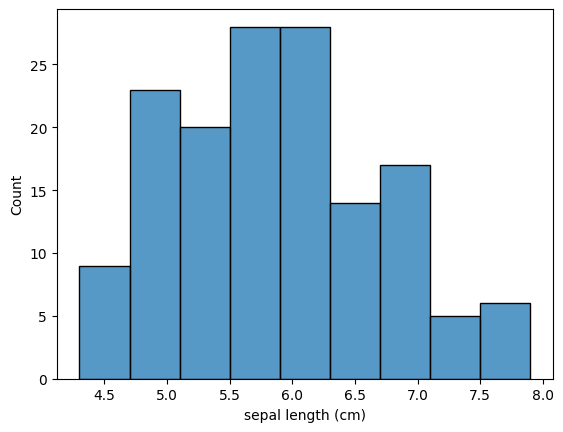

In [66]:
sns.histplot(iris_df['sepal length (cm)']);

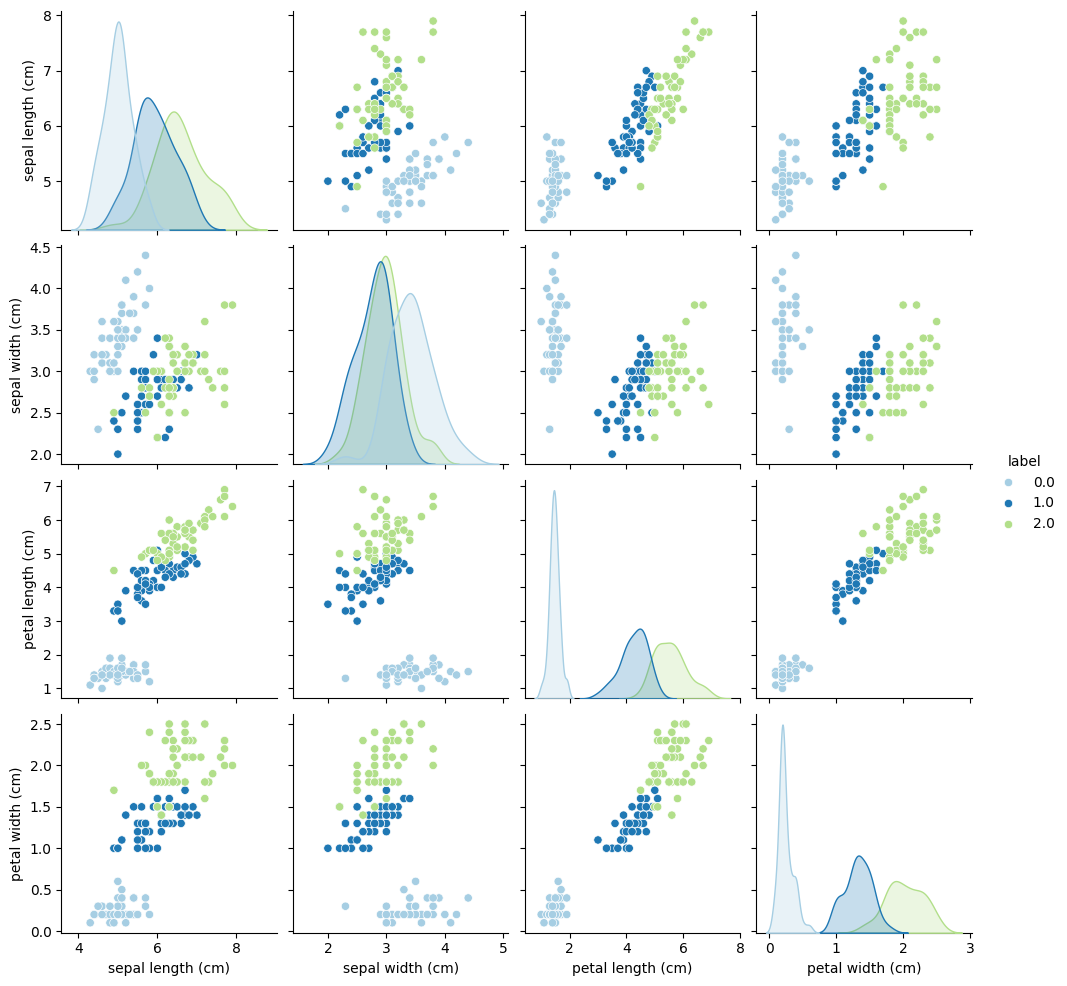

In [67]:
sns.color_palette("Paired")                                #palette를 만들어 주기
sns.pairplot(data=iris_df, hue='label',palette='Paired')   #hue='label'에 대해서 색상을 달리해라 #palette는 Paired를 사용해라

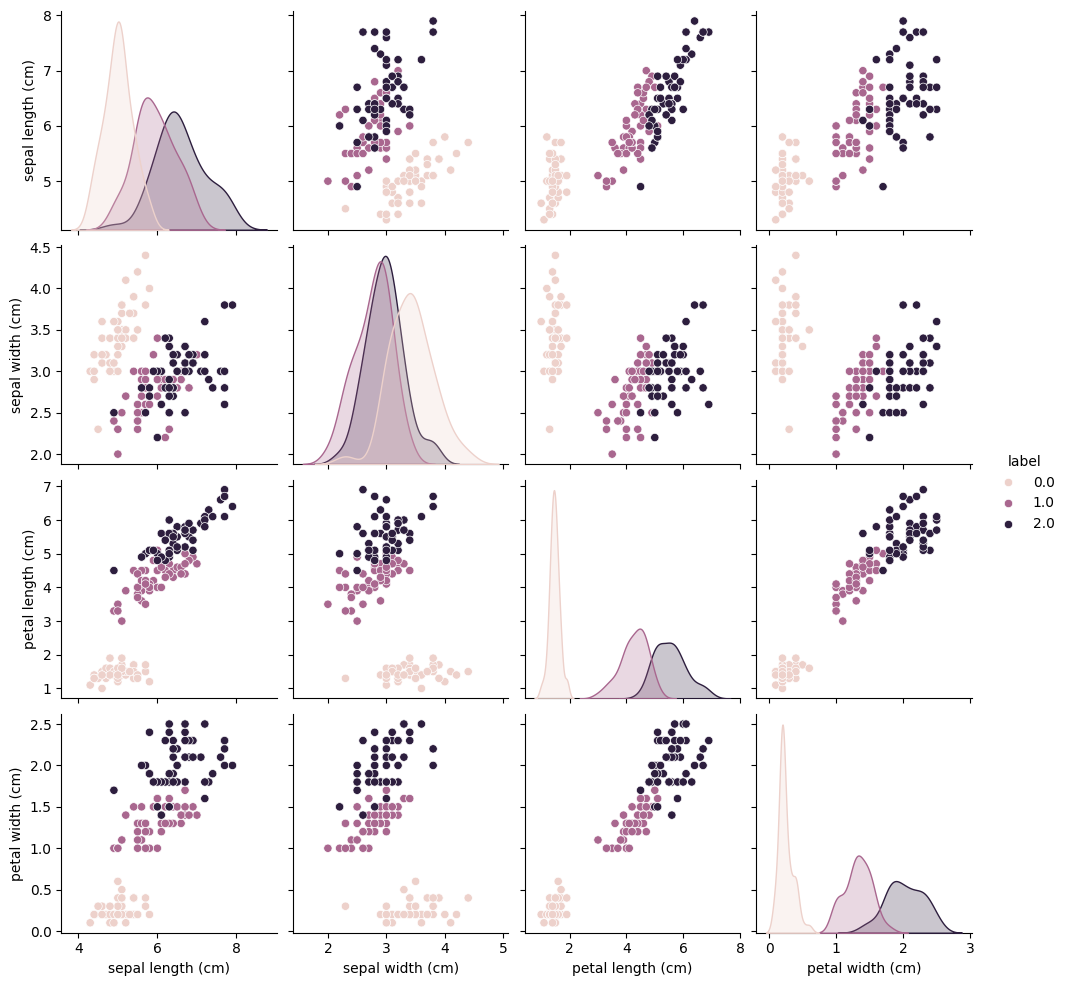

In [68]:
sns.pairplot(data=iris_df, hue='label')

In [69]:
sns.pairplot?

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

In [70]:
sns.color_palette?

Signature: sns.color_palette(palette=None, n_colors=None, desat=None, as_cmap=False)
Docstring:
Return a list of colors or continuous colormap defining a palette.

Possible ``palette`` values include:
    - Name of a seaborn palette (deep, muted, bright, pastel, dark, colorblind)
    - Name of matplotlib colormap
    - 'husl' or 'hls'
    - 'ch:<cubehelix arguments>'
    - 'light:<color>', 'dark:<color>', 'blend:<color>,<color>',
    - A sequence of colors in any format matplotlib accepts

Calling this function with ``palette=None`` will return the current
matplotlib color cycle.

This function can also be used in a ``with`` statement to temporarily
set the color cycle for a plot or set of plots.

See the :ref:`tutorial <palette_tutorial>` for more information.

Parameters
----------
palette : None, string, or sequence, optional
    Name of palette or None to return current palette. If a sequence, input
    colors are used but possibly cycled and desaturated.
n_colors : int, optional
 

In [71]:
iris_df.corr() #dataFrame의 상관 계수를 보유 준다.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

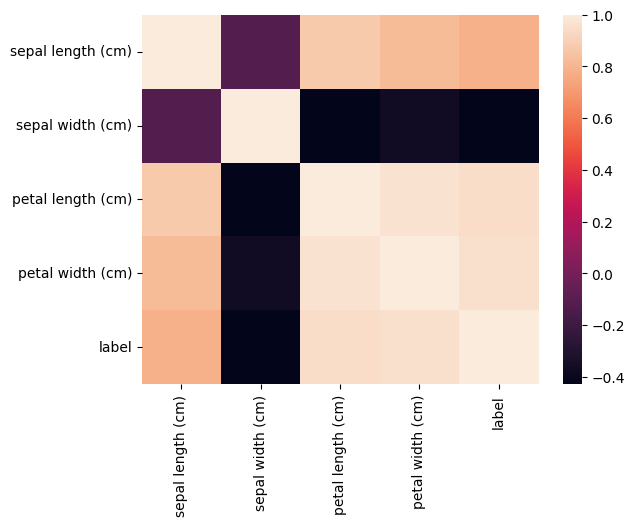

In [72]:
sns.heatmap(iris_df.corr()) #dataFrame의 heatmap 그리기

<Axes: >

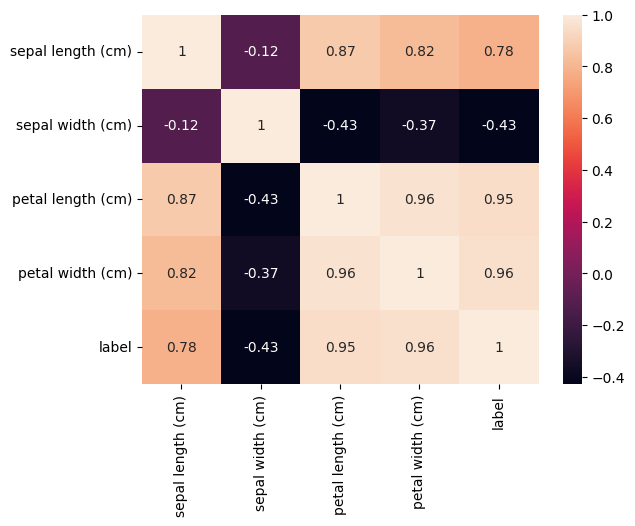

In [73]:
sns.heatmap(iris_df.corr(),annot = True) #dataFrame의 heatmap 그리기, annot = True 는 값 넣기

<Axes: >

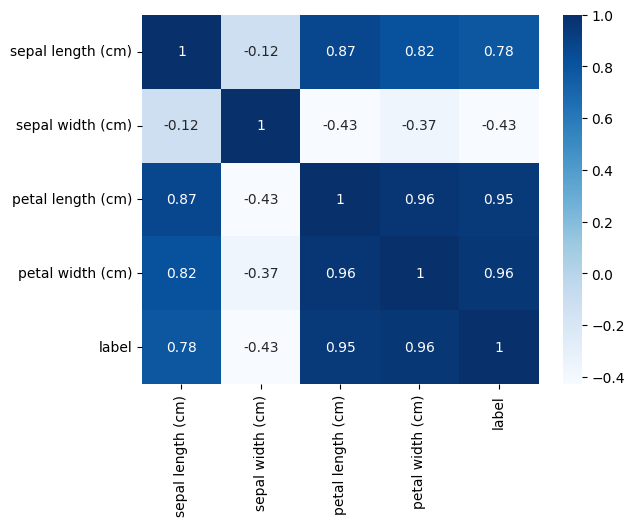

In [80]:
sns.heatmap(iris_df.corr(),annot = True,cmap="Blues") #dataFrame의 heatmap 그리기, annot = True 는 값 넣기, cmap = 색 option 넣기기

<Axes: >

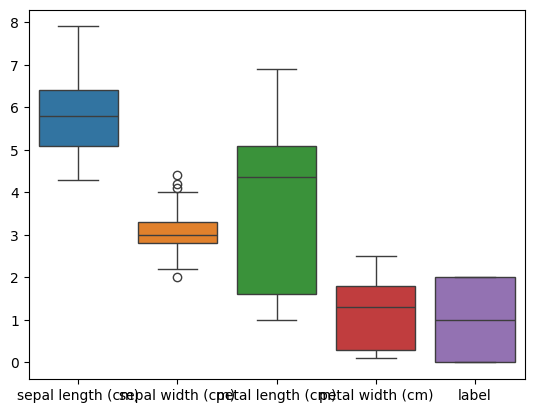

In [81]:
sns.boxplot(data = iris_df)

<Axes: >

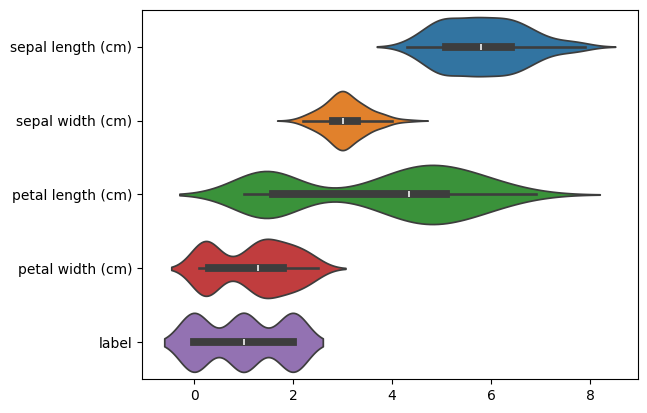

In [82]:
sns.violinplot(data = iris_df, orient = "h")

In [83]:
iris_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [84]:
iris_label[:5]

array([0, 0, 0, 0, 0])

In [85]:
#train_test_split을 이용해서 train,test data 만들기
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 42, stratify = iris_label ) #stratify는 주로 y값,iris_label이 test_size 0.2, train_size 0.8로 뽑는다.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#suffle은 default(True)일 때 randon_state는 suffle의 상태를 지정한다. 따라서 실제로 random하게 뽑아낼 때는
#suffle(True:default),random_state(미지정),stratify(y값)

(120, 4) (30, 4) (120,) (30,)


In [86]:
y_test_s = pd.Series(y_test)

In [87]:
y_test_s.value_counts() # y값(label : 0,1,2)를 조화롭게 뽑아낸다. stratify option 사용시시

0    10
2    10
1    10
Name: count, dtype: int64

In [88]:
#stratify option이 없이 만들때때
X_train2, X_test2, y_train2, y_test2 = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 42 ) 
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(120, 4) (30, 4) (120,) (30,)


In [89]:
y_test_s2 = pd.Series(y_test2)
y_test_s2.value_counts() # y값과 상관없이 마구잡이로 뽑아 낸다.

2    11
0    10
1     9
Name: count, dtype: int64

In [90]:
y_train_s = pd.Series(y_train)

In [91]:
y_train_s.value_counts()

0    40
2    40
1    40
Name: count, dtype: int64

In [92]:
# 의사결정나무 알고리즘을 이용한 예측 실행

In [93]:
# DecisionTreeClassIfier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=42)

In [94]:
# X_train(훈련용 문제), y_train(훈련용 정답)을 dt_clf(의사결정나무 알고리즘)에 넣어서 fit(훈련시킨다.)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [95]:
# 학습이 완료된 DecisionTreeClassifier 객체를 사용해서 테스트 데이터 세트로 예측 수행.
y_pred = dt_clf.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0])

In [96]:
y_test

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0])

In [97]:
#sklearn.metrics는 sklearn의 model의 각종 score가 모여 있다.
from sklearn.metrics import accuracy_score

In [98]:
a_score = accuracy_score(y_test, y_pred)
print(f"예측 정확도는 {a_score} 입니다.")

예측 정확도는 0.9333333333333333 입니다.


In [99]:
print("예측 정확도 %.4f" % (a_score))

예측 정확도 0.9333


In [100]:
from sklearn import tree

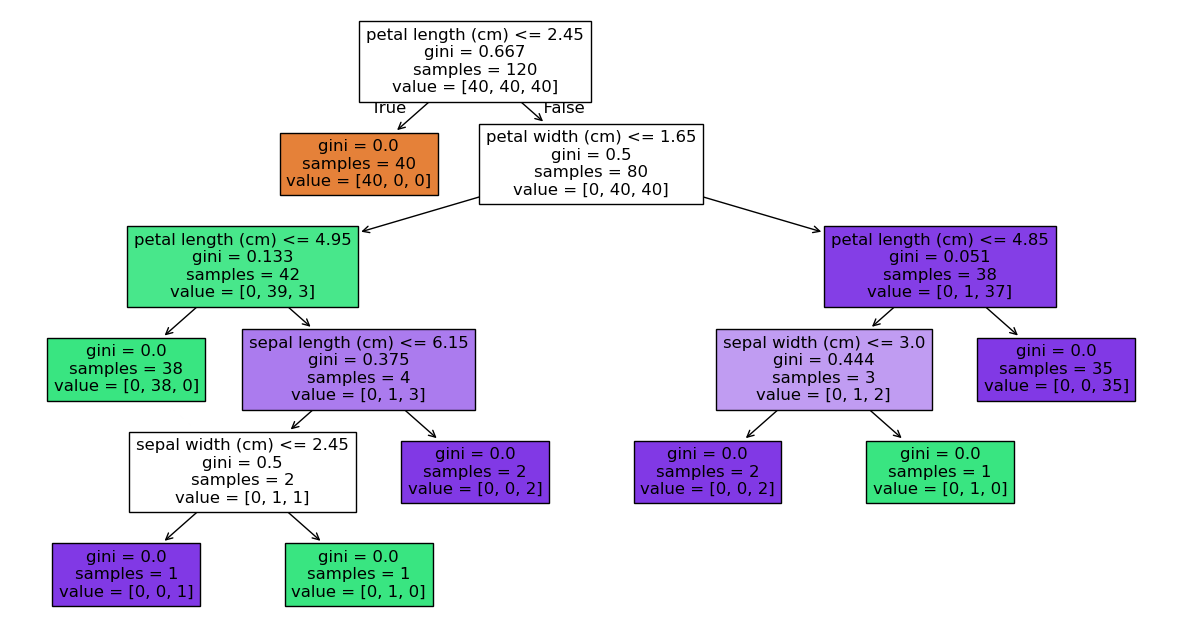

In [101]:
fig = plt.figure(figsize=(15, 8))
_ = tree.plot_tree(dt_clf,
                  feature_names=iris.feature_names,
                  filled=True)

In [102]:
y_pred_1 = dt_clf.predict(X_train)

In [103]:
a_score = accuracy_score(y_train, y_pred_1)
print(f"Train 예측 정확도는 {a_score} 입니다.")

Train 예측 정확도는 1.0 입니다.


In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
from sklearn.metrics import f1_score, roc_auc_score,precision_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [105]:
y_pred=dt_clf.predict(X_test)
print(classification_report(y_test,y_pred))
#support: Data 갯수
# 0은 10개 모두 0 예측, 1은 10개중 9개 맞추고 1개 틀림(2로 예측), 2은 10개 중 9개 맞추고 1개 틀림(1로 예측)
# 이 모델의 최종 weighted avg의 f1-score로 model의 성능으로 말한다.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



1.   confusion model을 먼저 그린다.
2.   Precision(모델 Positive 중 실제 True)
     = 실제 positive(True Postive) / 모델 positive(TP+NP)
3.   recall(실제 Positive 중 모델 Positive)
     = 모델 postive(Positive True)/ 실제 Positive(TP+NF)





           

In [106]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]], dtype=int64)

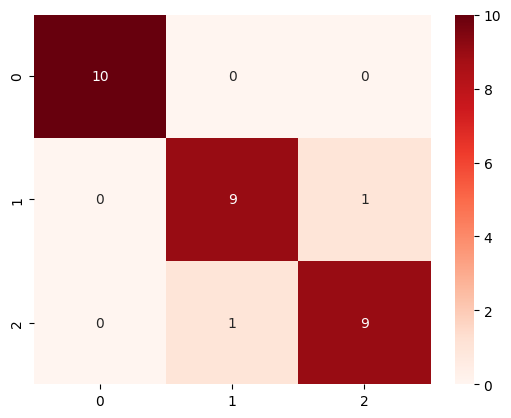

In [107]:
sns.heatmap(cm, annot = True,cmap='Reds')
plt.show()

In [108]:
# 새로 시작

In [109]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


In [110]:
print(iris_data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [111]:
print('\n feature_names 의 type:',type(iris_data.feature_names))
print(' feature_names 의 shape:',len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names 의 type:',type(iris_data.target_names))
print(' feature_names 의 shape:',len(iris_data.target_names))
print(iris_data.target_names)

print('\n data 의 type:',type(iris_data.data))
print(' data 의 shape:',iris_data.data.shape)
print(iris_data['data'])

print('\n target 의 type:',type(iris_data.target))
print(' target 의 shape:',iris_data.target.shape)
print(iris_data.target)


 feature_names 의 type: <class 'list'>
 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names 의 type: <class 'numpy.ndarray'>
 feature_names 의 shape: 3
['setosa' 'versicolor' 'virginica']

 data 의 type: <class 'numpy.ndarray'>
 data 의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x_train,x_test,y_train,y_test=train_test_split(iris_data.data, iris_data.target, test_size=0.2, stratify=iris_data.target)

In [114]:
len(x_train)

120

In [115]:
len(x_test)

30

In [116]:
len(y_train)

120

In [117]:
len(y_test)

30

## Model Selection 소개
### 학습/테스트 데이터 셋 분리 – train_test_split()

In [118]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data              #전체 Data를 Train X Data로 사용
train_label = iris.target           #전체 Target을 Train Y Data로 사용
dt_clf.fit(train_data, train_label) #fit으로 Train

# 학습 데이터 셋으로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:',accuracy_score(train_label,pred))

예측 정확도: 1.0


In [119]:
from sklearn.model_selection import train_test_split

In [120]:
x_train,x_test,y_train,y_test=train_test_split(train_data,train_label,test_size=0.2,stratify=train_label)

In [ ]:
DecisionTreeClassifier?

In [121]:
# 혼자 연습
from sklearn.datasets import load_iris #data_set 불러오기
from sklearn.model_selection import train_test_split #train_test_split 불러오기
from sklearn.tree import DecisionTreeClassifier #Decision Tree model 갖고오기

In [122]:
iris_data = load_iris()

In [123]:
print(iris_data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [124]:
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [125]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [126]:
train_x,test_x,train_y,test_y= train_test_split(iris_data.data,iris_data.target,test_size=0.2,shuffle=True,stratify=iris_data.target)

In [127]:
len(train_x)

120

In [128]:
len(train_y)

120

In [129]:
model = DecisionTreeClassifier()

In [130]:
model.fit(train_x,train_y)

DecisionTreeClassifier()

In [131]:
predict_y = model.predict(test_x)

In [132]:
test_y

array([0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 0, 2, 1, 1, 2, 0, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 0, 2])

In [133]:
model.score(test_x,test_y)

0.9666666666666667

In [134]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [135]:
cf = confusion_matrix(test_y,predict_y)

In [136]:
accuracy_score(test_y,predict_y)

0.9666666666666667

<Axes: >

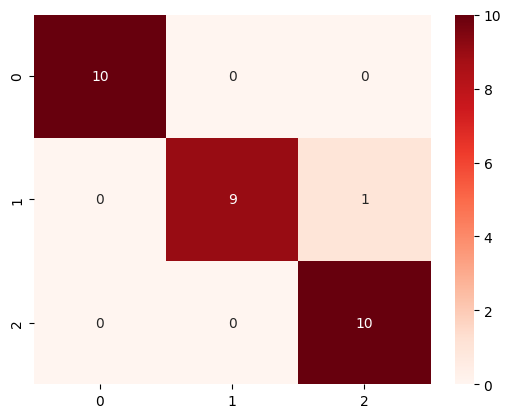

In [137]:
sns.heatmap(cf,annot=True,cmap='Reds')

In [138]:
print(f'예측 정확도: {accuracy_score(test_y,predict_y)}')

예측 정확도: 0.9666666666666667


In [ ]:
a = 3

%i,%a


In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.3, random_state=121)

In [140]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


In [141]:
x = confusion_matrix(y_test,pred)

<Axes: >

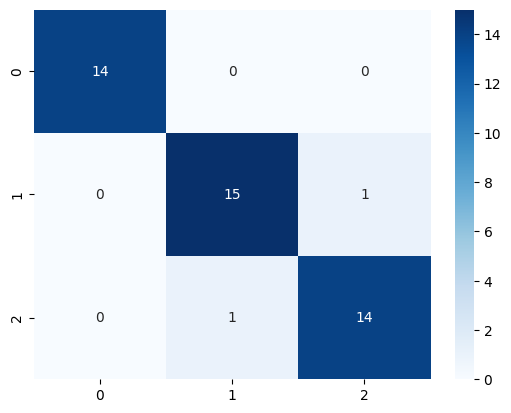

In [ ]:
sns.heatmap(x,annot=True,cmap='Blues')

교차 검증(K 폴드)

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import KFold
import numpy as np

In [143]:
iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])

붓꽃 데이터 세트 크기: 150


In [144]:
list(kfold.split(features))
#index이다.

[(array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
          43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
          69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
          82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
          95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
         108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
         121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
         134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
         147, 148, 149]),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])),
 (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27, 

In [145]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


In [147]:
n_iter = 0
for train_index,test_index in kfold.split(features):
  X_train= features[train_index]
  y_train= label[train_index]
  X_test = features[test_index]
  y_test = label[test_index]
  dt_clf.fit(X_train,y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
    # 반복 시 마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test,pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
        .format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


In [148]:
np.mean([1,0.9667,0.8667,0.9333,0.7333])

0.9

* Stratified K 폴드

In [149]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [150]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [151]:
kfold = KFold(n_splits=3)
# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환.
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    50
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    50
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
2    50
Name: count, dtype: int64


In [152]:
from sklearn.model_selection import StratifiedKFold
skf =StratifiedKFold(n_splits=3)
# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환.
n_iter =0
for train_index, test_index  in skf.split(iris_df,y=iris_df['label']):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
1    17
2    16
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
2    17
1    16
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    17
2    17
0    16
Name: count, dtype: int64


In [154]:
skf =StratifiedKFold(n_splits=3)
# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환.
n_iter = 0
for train_index,test_index in skf.split(iris_df,y=iris_df['label']):
  X_train= features[train_index]
  y_train= label[train_index]
  X_test = features[test_index]
  y_test = label[test_index]
  dt_clf.fit(X_train,y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
    # 반복 시 마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test,pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
        .format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9153846153846155


1

In [ ]:
list(skf.split(iris_df,y=iris_df['label']))

[(array([ 17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
          30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
          43,  44,  45,  46,  47,  48,  49,  67,  68,  69,  70,  71,  72,
          73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
          86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
          99, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
         128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
         141, 142, 143, 144, 145, 146, 147, 148, 149]),
  array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  50,  51,  52,  53,  54,  55,  56,  57,  58,
          59,  60,  61,  62,  63,  64,  65,  66, 100, 101, 102, 103, 104,
         105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115])),
 (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  34,  35,  36,  37,  38,  39,  40,

In [ ]:
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [155]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요
for train_index, test_index  in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


* cross_val_score( )

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개
# cross_val_score는 fit,predict를 안해도 된다.
scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=3)     ##accuracy를 제외한 나머지 성능지표를 하려면 '_weighted'를 붙여야 한다.
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


* GridSearchCV

In [157]:
cross_val_score?

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

    .

In [158]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [ ]:
GridSearchCV?

In [160]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True, scoring='accuracy')

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
# scores_df(DataFrame의 특정 column들만 출력)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [161]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [162]:
print(grid_dtree.scorer_)

make_scorer(accuracy_score, response_method='predict')


In [163]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


In [164]:
scores_df = pd.DataFrame(grid_dtree.cv_results_)

In [165]:
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000226,0.000320,0.000667,0.000471,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.700,0.7,0.70,0.700000,1.110223e-16,5
1,0.000313,0.000442,0.001012,0.001091,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.700,0.7,0.70,0.700000,1.110223e-16,5
2,0.000000,0.000000,0.000685,0.000484,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.925,1.0,0.95,0.958333,3.118048e-02,3
3,0.000517,0.000426,0.000323,0.000411,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.925,1.0,0.95,0.958333,3.118048e-02,3
4,0.000193,0.000273,0.000852,0.000243,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,1.0,0.95,0.975000,2.041241e-02,1
5,0.000620,0.000445,0.000341,0.000483,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.975,1.0,0.95,0.975000,2.041241e-02,1


### 데이터 인코딩
* 레이블 인코딩(Label encoding)

In [166]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [ ]:
LabelEncoder?

In [167]:
type(encoder.classes_)  ##LabelEncoder()의 calsser_ Attributes

numpy.ndarray

In [169]:
print('인코딩 클래스:',encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [170]:
encoder.inverse_transform(labels)

array(['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서'], dtype='<U5')

* 원-핫 인코딩(One-Hot encoding)

In [171]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 2차원 ndarray만 변환합니다. on-hot encoding의 입력은 2차원(-1,1)만 가능?
items = np.array(items).reshape(-1, 1)
items

array([['TV'],
       ['냉장고'],
       ['전자레인지'],
       ['컴퓨터'],
       ['선풍기'],
       ['선풍기'],
       ['믹서'],
       ['믹서']], dtype='<U5')

In [173]:
items.shape

(8, 1)

In [174]:
# 원-핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환.
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [177]:
oh_labels.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [178]:
oh_labels_columns = oh_encoder.inverse_transform(oh_labels)
oh_labels_columns

array([['TV'],
       ['냉장고'],
       ['전자레인지'],
       ['컴퓨터'],
       ['선풍기'],
       ['선풍기'],
       ['믹서'],
       ['믹서']], dtype='<U5')

In [179]:
oh_labels_df = pd.DataFrame(data=oh_labels.toarray(),
                            columns=['TV','냉장고','전자레인지','컴퓨터','선풍기','믹서'])

In [180]:
oh_labels_df

,TV,냉장고,전자레인지,컴퓨터,선풍기,믹서
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0


#Onehot Encoding은 대부분 pandas.get_dummies(df)를 사용한다.

In [183]:
items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

In [184]:
one_hot = pd.get_dummies(items)

In [185]:
one_hot

,TV,냉장고,믹서,선풍기,전자레인지,컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


In [186]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


In [187]:
df

,item
0,TV
1,냉장고
2,전자레인지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


### 피처 스케일링과 정규화
* StandardScaler

In [193]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())
print('\nfeature 들의 최소 값')
print(iris_df.min())
print('\nfeature 들의 최대대 값')
print(iris_df.max())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

feature 들의 최소 값
sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

feature 들의 최대대 값
sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64


# StandardScaler 설명

## 개념
StandardScaler는 데이터를 정규화하는 방법으로, 각 특성의 평균을 0으로, 분산을 1로 변환하는 방법입니다.

## 수식
표준화 공식:
$$ z = \frac{x - \mu}{\sigma} $$
- x: 원본 값
- μ: 평균
- σ: 표준편차
- z: 변환된 값

## 코드 예시
```python
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 데이터 준비
data = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                    'B': [2, 4, 6, 8, 10]})

# StandardScaler 적용
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 결과를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
```

## 사용 시기
- 머신러닝 알고리즘 적용 전
- 특성들의 스케일이 다른 경우
- 정규분포를 따르는 데이터 처리 시
- 이상치가 있는 데이터 처리 시

## 장점
- 이상치에 덜 민감
- 정규분포 특성 유지
- 알고리즘 성능 향상
- 수렴 속도 개선

## 주의사항
- 학습/테스트 데이터 분리 후 적용
- 희소 행렬에는 부적합
- 음수 값 발생 가능

In [195]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())
print('\nfeature 들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature 들의 최대 값')
print(iris_df_scaled.max())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64

feature 들의 최소 값
sepal length (cm)   -1.870024
sepal width (cm)    -2.433947
petal length (cm)   -1.567576
petal width (cm)    -1.447076
dtype: float64

feature 들의 최대 값
sepal length (cm)    2.492019
sepal width (cm)     3.090775
petal length (cm)    1.785832
petal width (cm)     1.712096
dtype: float64


* MinMaxScaler

# MinMaxScaler 설명

## 정의
MinMaxScaler는 모든 특성을 0과 1 사이의 범위로 변환하는 정규화 도구입니다.

## 수식
$$ X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}} $$

## 코드 예시
```python
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# 데이터 준비
data = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [2, 4, 6, 8, 10]
})

# MinMaxScaler 적용
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 결과를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
```

## 특징
- 모든 특성이 0~1 범위로 변환
- 원본 데이터의 분포 형태 유지
- feature_range 파라미터로 범위 조정 가능
- 이상치에 민감

## 사용 시기
- 신경망 학습
- 이미지 처리
- 비정규분포 데이터 처리
- 특성 간 스케일 차이가 클 때

## 주의사항
- 학습/테스트 데이터 분리 후 적용
- 이상치 존재 시 왜곡 가능성
- 희소 행렬에는 부적합
- 데이터 분포가 치우친 경우 성능 저하 가능

In [197]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit_transform으로 fit과 transform을 한꺼번에 실행하기기
iris_scaled = scaler.fit_transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())
print('\nfeature들의 최소값')
print(iris_df_scaled.min())
print('\nfeature들의 최대값')
print(iris_df_scaled.max())

feature 들의 평균 값
sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64

feature들의 최소값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


* Scaler를 이용하여 학습 데이터와 테스트 데이터에 fit(), transform(), fit_transform() 적용 시 유의사항.